<a href="https://colab.research.google.com/github/JunaidKhattak252/Java/blob/main/FirstCnnProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 151MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators---->divide the dataset into batches
train_ds=keras.utils.image_dataset_from_directory(
     directory='/content/train',
     label_mode='int',
     batch_size=32,
     image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normailzation
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 105ms/step - loss: 1.4807 - accuracy: 0.6009 - val_loss: 0.6508 - val_accuracy: 0.6116
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5755 - accuracy: 0.7045 - val_loss: 0.9457 - val_accuracy: 0.6034
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5086 - accuracy: 0.7567 - val_loss: 0.4843 - val_accuracy: 0.7718
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4343 - accuracy: 0.7991 - val_loss: 0.7179 - val_accuracy: 0.6250
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3810 - accuracy: 0.8292 - val_loss: 0.4788 - val_accuracy: 0.7662
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3164 - accuracy: 0.8633 - val_loss: 0.4329 - val_accuracy: 0.8118
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2441 - accuracy: 0.8991 - val_loss: 0.4594 - val_ac

In [18]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Displaying the final training and validation accuracy
print(f"Final Training Accuracy: {train_accuracy[-1]}")
print(f"Final Validation Accuracy: {val_accuracy[-1]}")

Final Training Accuracy: 0.9677000045776367
Final Validation Accuracy: 0.8073999881744385


In [19]:
loss, accuracy = model.evaluate(validation_ds)
print(f"Validation Accuracy: {accuracy}")

157/157 [==============================] - 9s 53ms/step - loss: 0.6947 - accuracy: 0.8074
Validation Accuracy: 0.8073999881744385


In [11]:
# Save the model
model.save('dog_cat_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


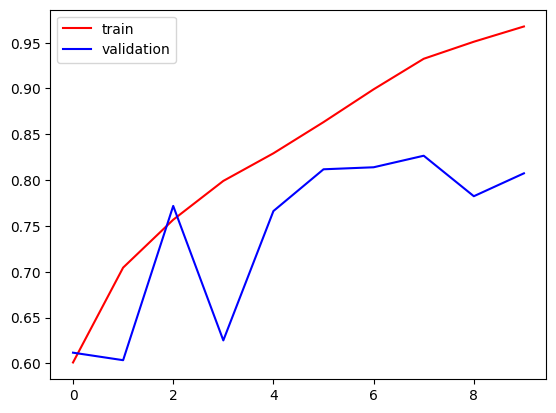

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

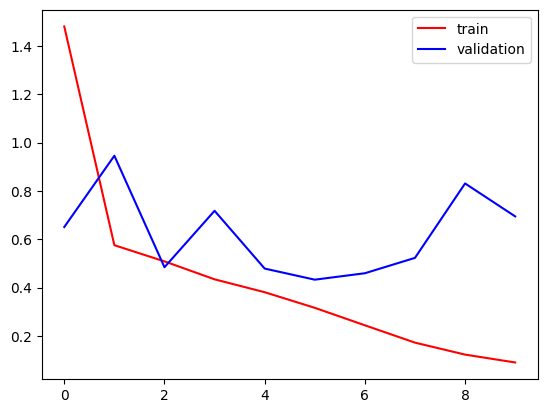

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
from google.colab import files
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [15]:
# Load the trained model
model = load_model('dog_cat_classifier.h5')

In [16]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Resize the image
    img_array = image.img_to_array(img)  # Convert the image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image array
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    return 'Cat' if prediction[0][0] < 0.5 else 'Dog'

Saving cat1.webp to cat1.webp
User uploaded file "cat1.webp"
1/1 [==============================] - 0s 18ms/step
The uploaded image is a Cat.


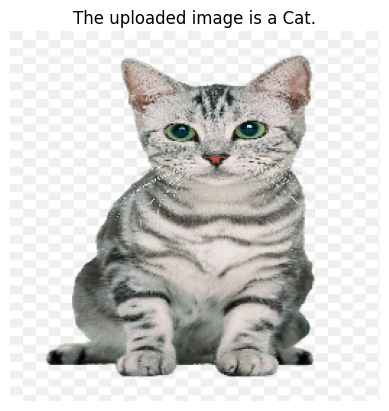

In [20]:
uploaded = files.upload()

# Process and predict the uploaded image
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}"')
    result = predict_image(fn)
    print(f'The uploaded image is a {result}.')

    # Display the image
    img = image.load_img(fn, target_size=(256, 256))
    plt.imshow(img)
    plt.title(f'The uploaded image is a {result}.')
    plt.axis('off')  # Hide axis
    plt.show()